In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the CustomerChurn dataset from the Google Drive and converting it to dataframe
data =pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')
data1 = pd.DataFrame(data)
data1.info()
data1.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [4]:
#Selecting the features that can contribute to a customer churn
df = data1[['SeniorCitizen', 'Partner', 'Dependents','tenure','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


In [5]:
#describing what these features look like
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
#This line of code is mapping the values in the 'Churn' column of df.
# Replacing the values 'Yes' with 1 and 'No' with 0 in the 'Churn' column.
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

<ipython-input-6-3c7cae5f2ddf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


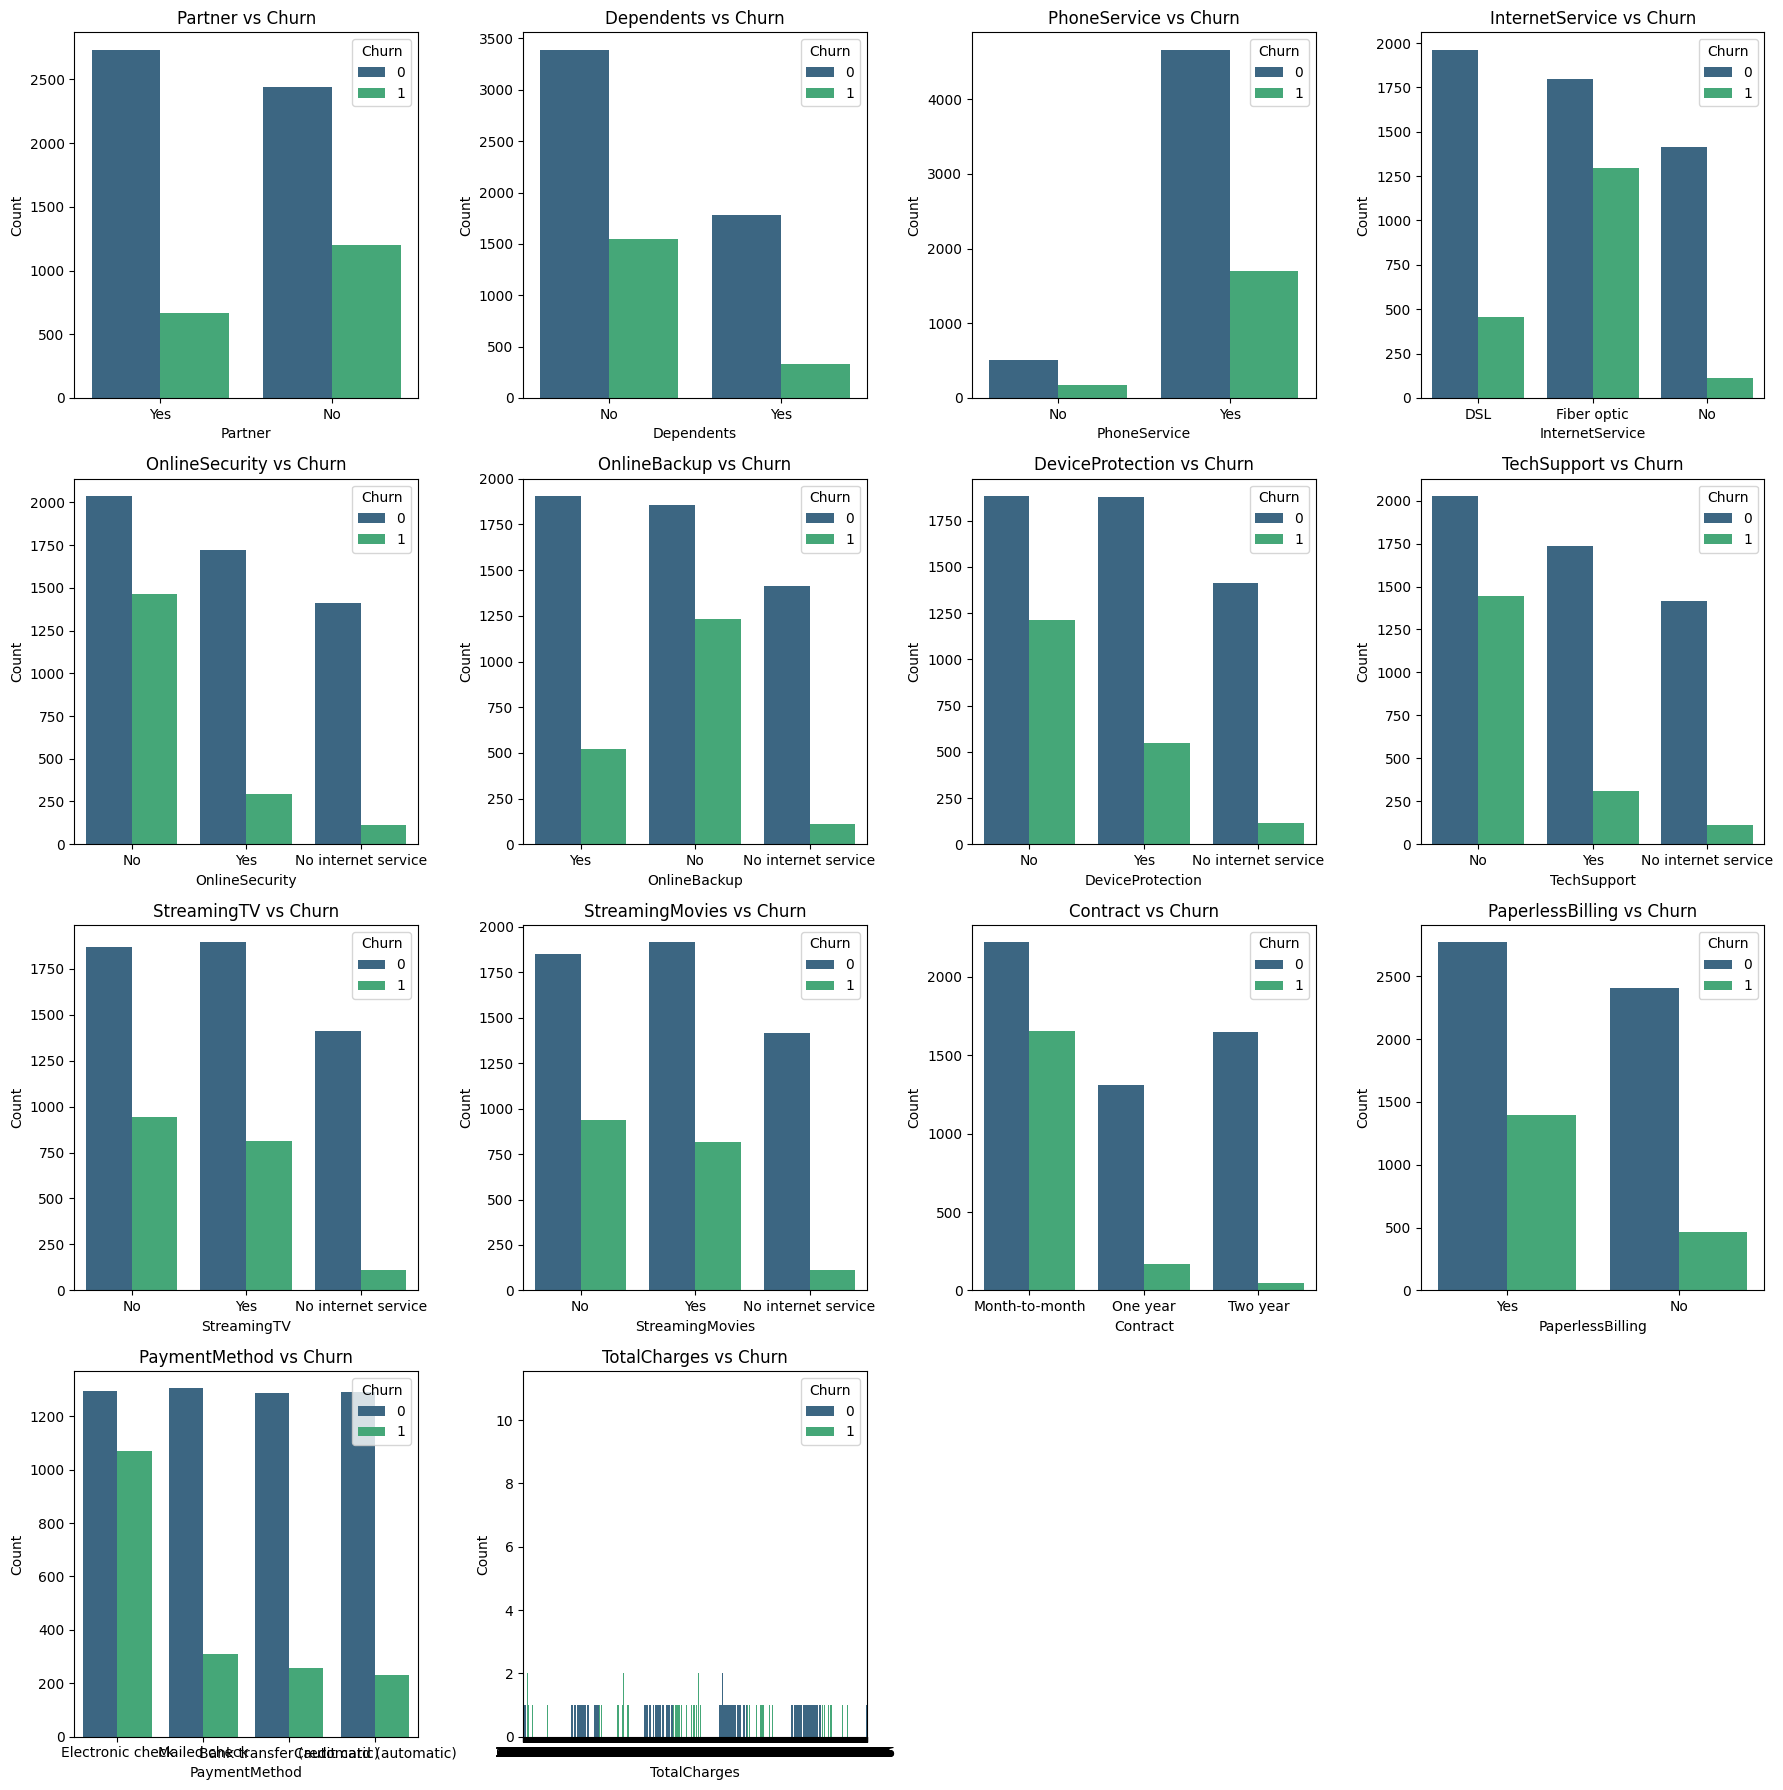

In [7]:
#Picking the categorical columns
categorical_columns = df.select_dtypes(include=['object'])

if not categorical_columns.empty:
    # Create individual count plots for each categorical variable
    plt.figure(figsize=(18, 18))
    for i, feature in enumerate(categorical_columns, 1):
        plt.subplot(4, 4, i)
        sns.countplot(x=feature, hue='Churn', data=df, palette='viridis')
        plt.title(f'{feature} vs Churn')
        plt.xlabel(feature)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns to plot.")

In [ ]:
# Picking the numeric columns
numerics = df.select_dtypes(include=['int64', 'float64'])

if not numerics.empty:
    # Create individual count plots for each numeric variable
    plt.figure(figsize=(18, 18))
    for i, feature in enumerate(numerics, 1):
        plt.subplot(4, 4, i)
        sns.histplot(x=feature, hue='Churn', data=df, palette='viridis', kde=True)
        plt.title(f'{feature} vs Churn')
        plt.xlabel(feature)
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns to plot.")


# EDA Explanation
1. Partner - Fewer people with or without partners seem to churn, however, their numbers are lesser compared to those individuals who do not churn irregardless of having a partner or not.

2. Dependant - The people that do not churn have more numbers(with or without having depandants)

3. Phone Service - The people with Phone service have the most counts for not churning.
4. Internet Service - Without or without the internet service,more people are not churning. And this pattern seems to be the same for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, and TotalCharges.

In order to continue with training a model for the customer churn, l decided to use correlation to pick these variables, the threshold l used for this was for those features with a correlation with Churn of 0.15 and above. This way, it would allow me to train a model with the features with the most influence of the customer churn potentially boosting model performance.
Overall, this analysis provided a reason for feature selection based on correlations, which could improve the prediction model's accuracy for customer churn.



# Steps Towards Picking the Features

In [8]:
y = df['Churn']
df.drop('Churn', axis=1, inplace=True)

<ipython-input-8-399f99e0e158>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Churn', axis=1, inplace=True)


In [9]:
from sklearn.preprocessing import StandardScaler

In [53]:
numerical_columns = df.select_dtypes(exclude=['object']).columns
numerical_columns

Index(['Partner', 'Dependents', 'PhoneService', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'Churn'],
      dtype='object')

In [11]:
scale = StandardScaler()
scaled_numerics = scale.fit_transform(df[numerical_columns])
scal = pd.DataFrame(scaled_numerics, columns=numerical_columns)
df.drop(columns=numerical_columns, inplace=True)
df = pd.concat([df,scal], axis=1)
df.head()

<ipython-input-11-1dad12870b53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=numerical_columns, inplace=True)


,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
0,Yes,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,-0.439916,-1.277445,-1.160323
1,No,No,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,-0.439916,0.066327,-0.259629
2,No,No,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,-0.439916,-1.236724,-0.362660
3,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,-0.439916,0.514251,-0.746535
4,No,No,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,-0.439916,-1.236724,0.197365


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
for i in categorical_columns.columns:
  encoder = LabelEncoder()
  df[i] = encoder.fit_transform(df[i])
df.head()

,Partner,Dependents,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
0,1,0,0,0,0,2,0,0,0,0,0,1,2,2505,-0.439916,-1.277445,-1.160323
1,0,0,1,0,2,0,2,0,0,0,1,0,3,1466,-0.439916,0.066327,-0.259629
2,0,0,1,0,2,2,0,0,0,0,0,1,3,157,-0.439916,-1.236724,-0.362660
3,0,0,0,0,2,0,2,2,0,0,1,0,0,1400,-0.439916,0.514251,-0.746535
4,0,0,1,1,0,0,0,0,0,0,0,1,2,925,-0.439916,-1.236724,0.197365


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   int64  
 1   Dependents        7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   InternetService   7043 non-null   int64  
 4   OnlineSecurity    7043 non-null   int64  
 5   OnlineBackup      7043 non-null   int64  
 6   DeviceProtection  7043 non-null   int64  
 7   TechSupport       7043 non-null   int64  
 8   StreamingTV       7043 non-null   int64  
 9   StreamingMovies   7043 non-null   int64  
 10  Contract          7043 non-null   int64  
 11  PaperlessBilling  7043 non-null   int64  
 12  PaymentMethod     7043 non-null   int64  
 13  TotalCharges      7043 non-null   int64  
 14  SeniorCitizen     7043 non-null   float64
 15  tenure            7043 non-null   float64
 16  MonthlyCharges    7043 non-null   float64


In [15]:
df['Churn'] = y

In [16]:
correlate = df.corr()

In [17]:
#Picking the columns based on the 0.15 threshold
highly_correlated_columns = correlate.index[correlate['Churn'].abs() >= 0.15]
new_df = df[highly_correlated_columns]
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   int64  
 1   Dependents        7043 non-null   int64  
 2   OnlineSecurity    7043 non-null   int64  
 3   OnlineBackup      7043 non-null   int64  
 4   DeviceProtection  7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   Contract          7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   SeniorCitizen     7043 non-null   float64
 9   tenure            7043 non-null   float64
 10  MonthlyCharges    7043 non-null   float64
 11  Churn             7043 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 660.4 KB


In [18]:
y = new_df['Churn']
new_df.drop('Churn', axis=1, inplace=True)

<ipython-input-18-1475f4531076>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop('Churn', axis=1, inplace=True)


In [19]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4168818129186193104
 xla_global_id: -1]

In [20]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical, plot_model

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   int64  
 1   Dependents        7043 non-null   int64  
 2   OnlineSecurity    7043 non-null   int64  
 3   OnlineBackup      7043 non-null   int64  
 4   DeviceProtection  7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   Contract          7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   SeniorCitizen     7043 non-null   float64
 9   tenure            7043 non-null   float64
 10  MonthlyCharges    7043 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 605.4 KB


In [22]:
X = new_df
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Partner           7043 non-null   int64  
 1   Dependents        7043 non-null   int64  
 2   OnlineSecurity    7043 non-null   int64  
 3   OnlineBackup      7043 non-null   int64  
 4   DeviceProtection  7043 non-null   int64  
 5   TechSupport       7043 non-null   int64  
 6   Contract          7043 non-null   int64  
 7   PaperlessBilling  7043 non-null   int64  
 8   SeniorCitizen     7043 non-null   float64
 9   tenure            7043 non-null   float64
 10  MonthlyCharges    7043 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 605.4 KB


In [23]:
print(X.shape, y.shape)


(7043, 11) (7043,)


In [24]:
from sklearn.model_selection import train_test_split

Xtrain, Xt, Ytrain, Yt = train_test_split(X, y, test_size=0.2, random_state=42)
# Xtrain: Features for the training set.
# Xt: Temporary features set.
# Ytrain: Target variable for the training set.
# Yt: Temporary target variable set.

Xtest, Xval, Ytest, Yval = train_test_split(Xt, Yt, test_size=0.5, random_state=42)
# Xtest: Features for the testing set.
# Xval: Features for the validation set.
# Ytest: Target variable for the testing set.
# Yval: Target variable for the validation set.


In [25]:
print("Column names in Xtest:", Xtest.columns.tolist())

Column names in Xtest: ['Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'SeniorCitizen', 'tenure', 'MonthlyCharges']


In [26]:
print("Number of columns in Xtrain:", Xtrain.shape[1])
print("Number of columns in Ytrain:", 1 if isinstance(Ytrain, pd.Series) else Ytrain.shape[1])
print("Number of columns in Xtest:", Xtest.shape[1])
print("Number of columns in Ytest:", 1 if isinstance(Ytest, pd.Series) else Ytest.shape[1])
print("Number of columns in Xval:", Xval.shape[1])
print("Number of columns in Yval:", 1 if isinstance(Yval, pd.Series) else Yval.shape[1])


Number of columns in Xtrain: 11
Number of columns in Ytrain: 1
Number of columns in Xtest: 11
Number of columns in Ytest: 1
Number of columns in Xval: 11
Number of columns in Yval: 1


In [27]:
!pip install scikeras

In [28]:
import tensorflow as tf
from tensorflow.compat.v1.keras.backend import set_session
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import StratifiedKFold
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [29]:
# Limit GPU memory usage
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8  # Adjust as needed
set_session(tf.compat.v1.Session(config=config))

In [30]:
# from keras.src.engine import input_layer
from keras.layers import Input, Dense

In [37]:
def create_model(input_shape):
  input_layer = Input(shape=(input_shape,))
  hidden_layer_1 = Dense(32, activation='relu')(input_layer)
  hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
  hidden_layer_3 = Dense(32, activation='relu')(hidden_layer_2)
  hidden_layer_4 = Dense(24, activation='relu')(hidden_layer_3)
  output_layer = Dense(1, activation='sigmoid')(hidden_layer_4)
  model = Model(inputs=input_layer, outputs=output_layer)

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

#model = KerasClassifier(build_fn=create_model,input_shape=Xtrain.shape[1],epochs=200, batch_size=32, verbose=0)
model = KerasClassifier(build_fn=create_model, input_shape=11,epochs=200, batch_size=32, verbose=0)

In [41]:
param_grid = dict(
                  batch_size=[128, 256],
                  epochs=[100, 500, 1000],
                  optimizer =['adam','rmsprop','nadam'],

                  )

In [42]:
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [44]:
grid_result= grid.fit(Xtrain, Ytrain)
#[result.best_score_,result.best_params_]

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/scikeras

In [45]:
[grid_result.best_score_,grid_result.best_params_]

[0.7813278466070188, {'batch_size': 256, 'epochs': 100, 'optimizer': 'nadam'}]

In [46]:
print("Good parameters: ", grid_result.best_params_)

Good parameters:  {'batch_size': 256, 'epochs': 100, 'optimizer': 'nadam'}


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [49]:
# Use the best parameters from the grid search
optimized_batch_size = grid_result.best_params_['batch_size']
optimized_epochs = grid_result.best_params_['epochs']
optimized_optimizer = grid_result.best_params_['optimizer']


# Create the final model with the best parameters
another_model = create_model(X.shape[1])
another_model.compile(loss='binary_crossentropy', optimizer=optimized_optimizer, metrics=['accuracy'])
#another_model.fit(X, y, epochs=optimized_epochs, batch_size=optimized_batch_size, verbose=1)
another_model.fit(Xtrain, Ytrain, epochs=optimized_epochs, batch_size=optimized_batch_size, validation_data=(Xval, Yval), verbose=1)

# Evaluate accuracy and AUC score on the final model
final_accuracy = another_model.evaluate(Xtest, Ytest)[1]
Ypred_prob = another_model.predict(Xtest)
final_auc = roc_auc_score(Ytest, Ypred_prob)

print(f'Final Accuracy: {final_accuracy}')
print(f'Final AUC Score: {final_auc}')


Epoch 1/100
23/23 [==============================] - 4s 13ms/step - loss: 0.6945 - accuracy: 0.5328 - val_loss: 0.5966 - val_accuracy: 0.7376
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5512 - accuracy: 0.7346 - val_loss: 0.4951 - val_accuracy: 0.7362
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4849 - accuracy: 0.7430 - val_loss: 0.4440 - val_accuracy: 0.7560
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4579 - accuracy: 0.7771 - val_loss: 0.4146 - val_accuracy: 0.7901
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4411 - accuracy: 0.7836 - val_loss: 0.4014 - val_accuracy: 0.8099
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4359 - accuracy: 0.7890 - val_loss: 0.3972 - val_accuracy: 0.8113
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.7911 - val_loss: 0.3970 - val_accuracy: 0.8170
Epoch 8/100


In [ ]:
Ypred_prob

In [ ]:
print(Xtest)

In [50]:
from keras.models import save_model

another_model.save("/content/drive/MyDrive/Colab Notebooks/churn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.models import save_model

# Assuming create_model is a function that returns a Keras model
model = create_model(input_shape=11)  # Specify the correct input shape

# Save the entire model to an HDF5 file with custom_objects
save_model(model, "/content/drive/MyDrive/Colab Notebooks/create_model.h5")


In [ ]:
from keras.models import save_model, load_model

# Save the entire model to an HDF5 file
another_model.save("/content/drive/MyDrive/Colab Notebooks/new_model.h5")

# Load the model back with custom_objects
loaded_model = load_model("/content/drive/MyDrive/Colab Notebooks/new_model.h5", custom_objects={'create_model': create_model})


In [52]:
import pickle
from sklearn.preprocessing import StandardScaler

# Assuming scaler is your already fitted StandardScaler
with open('/content/drive/MyDrive/Colab Notebooks/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scale, scaler_file)